# Algo - Graphe - Composantes connexes

Les graphes sont un outil très utilisé pour modéliser un ensemble de relations entre personnes, entre produits, entre consommateurs. Les utilisations sont nombreuses, systèmes de recommandations, modélisation de la propagation d'une épidémie, modélisation de flux, plus court chemin dans un graphe.

Un graphe est décrit par un ensemble *V* de noeuds (ou *vertices* en anglais) et un ensemble d'arcs (ou *edges* en anglais) reliant deux noeuds entre eux. Chaque arc peut être orienté - un seul chemin d'une extrémité à l'autre est possible - ou pas.

L'algorithme proposé dans ce notebook calcule les composantes connexes dans un graphe non orienté. Un [graphe connexe](https://fr.wikipedia.org/wiki/Graphe_connexe) vérifie la propriété suivante : pour tout couple de noeuds, il existe un chemin - une séquence d'arcs - reliant ces deux noeuds. Si un graphe est connexe, il contient une seule composante connexe, s'il ne l'est pas, alors on peut le diviser en sous-graphe connexe de telle sorte qu'il n'existe aucun arc reliant deux noeuds appartenant à des sous-graphes distincts.

Un graphe est entièrement défini par sa [matrice d'adjacence](https://fr.wikipedia.org/wiki/Matrice_d%27adjacence) $M=(m_{ij})$ : $m_{ij} = 1$ si les noeuds $V_i$  et $V_j$ sont reliés entre eux, 0 sinon. Si le graphe est orienté alors $m_{ij} = m_{ji}$ : la matrice est symétrique.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Enoncé



### Q1 : construire une matrice d'adjacence symétrique aléatoire


In [3]:
def random_adjacency_matrix(n, alpha=0.3):
    # alpha est le taux de remplissage, plus il est faible, plus la probabilité
    # d'avoir plusieurs composantes connexes est grande.
    # ...
    return None

### Q2 : calculer les valeurs propres et les trier par ordre croissant

Il faudra recommencer avec plusieurs valeurs de *alpha* différentes pour avoir une idée de ce qu'il se passe.

### Q3 : que fait l'algorithme suivant

On crée un tableau ``T=list(range(n))`` où ``n`` est le nombre de noeuds.

Pour tous les arcs $V=(E_i, E_j)$ faire ``T[i] = T[j] = min(T[i], T[j])``.

Recommencer tant qu'une valeur de ``T`` est mise à jour.

### Q4 : construire un algorithme qui retourne les composantes connexes d'un graphe


## Réponses

### Q1 : construire une matrice d'adjacence symétrique aléatoire

On change un peu l'énoncé et on remplace les valeurs nulles sur la diagonale par l'opposé du degré de chaque noeud. Le degré d'un noeud est le nombre d'arc relié à ce noeud. De cette façon, la somme des coefficients sur une ligne est nulle. Donc il existe un vecteur propre associé à la valeur propre 0.

In [7]:
import numpy

def random_symmetric_adjacency_matrix(n, alpha=0.3):
    rnd = numpy.random.rand(n, n)
    rnd = (rnd + rnd.T) / 2  # symétrique
    rnd2 = rnd.copy()  # copie
    rnd2[rnd <= alpha] = 1
    rnd2[rnd > alpha] = 0
    for i in range(n):
        rnd2[i, i] = 0  # 0 sur la diagonale
        rnd2[i, i] = - rnd2[i, :].sum()
    return rnd2

random_symmetric_adjacency_matrix(5, alpha=0.5)

array([[-3.,  1.,  0.,  1.,  1.],
       [ 1., -2.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 1.,  0.,  1., -3.,  1.],
       [ 1.,  1.,  0.,  1., -3.]])

100%|██████████| 11/11 [00:01<00:00,  8.77it/s]


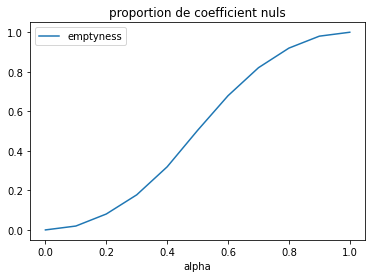

In [8]:
from tqdm import tqdm
import pandas

N = 2000
obs = []
for alpha in tqdm([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]):
    total_nb1 = 0
    for i in range(0, N):
        mat = random_symmetric_adjacency_matrix(10, alpha=alpha)
        nb1 = (mat.ravel() == 1).sum()
        total_nb1 += nb1
    obs.append(dict(alpha=alpha, emptyness=total_nb1 / (mat.size - mat.shape[0]) / N))

df = pandas.DataFrame(obs)
df.plot(x="alpha", y="emptyness", title='proportion de coefficient nuls');

### Q2 : calculer les valeurs propres et les trier par ordre croissant

In [9]:
w, v = numpy.linalg.eig(mat)
w

array([-10.+0.00000000e+00j,   0.+0.00000000e+00j, -10.+0.00000000e+00j,
       -10.+0.00000000e+00j, -10.+1.43217089e-15j, -10.-1.43217089e-15j,
       -10.+0.00000000e+00j, -10.+0.00000000e+00j, -10.+9.33095071e-16j,
       -10.-9.33095071e-16j])

In [10]:
sum(numpy.abs(w) < 1e-7)

1

100%|██████████| 11/11 [00:01<00:00,  7.07it/s]


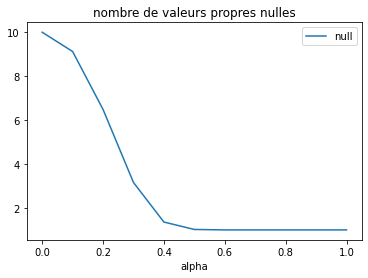

In [11]:
N = 1000
obs = []
for alpha in tqdm([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]):
    total_null = 0
    for i in range(0, N):
        mat = random_symmetric_adjacency_matrix(10, alpha=alpha)
        w, v = numpy.linalg.eig(mat)
        nb_null = sum(numpy.abs(w) < 1e-7)
        total_null += nb_null
    obs.append(dict(alpha=alpha, null=total_null / N))

df = pandas.DataFrame(obs)
df.plot(x="alpha", y="null", title='nombre de valeurs propres nulles');

On peut lire ce graphe de plusieurs façons. Tout d'abord, si `alpha=0`, il n'y a aucun arc et la matrice est nulle, toutes les valeurs propres sont nulles. Si `alpha` est petit, il y a peu de coefficients non nuls et il est impossible de compresser l'information qu'elle contient en une matrice de rang inférieur.

### Q3 : que fait l'algorithme suivant

On crée un tableau ``T=list(range(n))`` où ``n`` est le nombre de noeuds.

Pour tous les arcs $V=(E_i, E_j)$ faire ``T[i] = T[j] = min(T[i], T[j])``.

Recommencer tant qu'une valeur de ``T`` est mise à jour.

In [12]:
def connex_components(mat):
    N = mat.shape[0]
    T = numpy.arange(N)
    
    modifications = True
    while modifications:
        modifications = False
        for i in range(N):
            for j in range(i+1, N):
                if mat[i, j] == 1 and T[i] != T[j]:
                    T[i] = T[j] = min(T[i], T[j])
                    modifications = True
    return T

mat = random_symmetric_adjacency_matrix(10, alpha=0.2)
res = connex_components(mat)
res

array([0, 0, 0, 3, 4, 0, 6, 7, 8, 4])

Le nombre de composantes connexes correspond au nombre de numéro distincts dans le tableau que la fonction retourne.

100%|██████████| 11/11 [00:00<00:00, 37.84it/s]


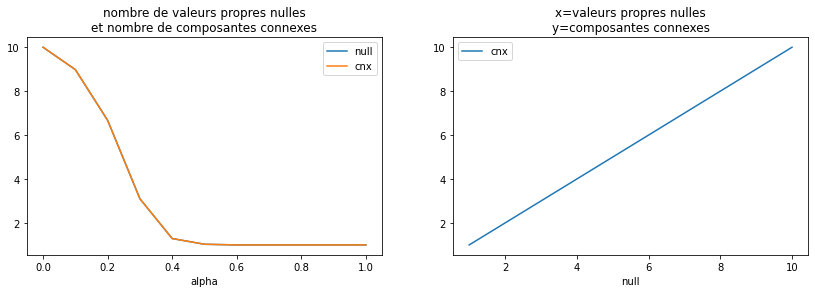

In [13]:
import matplotlib.pyplot as plt

N = 100
obs = []
for alpha in tqdm([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]):
    total_null = 0
    total_cnx = 0
    for i in range(0, N):
        mat = random_symmetric_adjacency_matrix(10, alpha=alpha)
        cnx = len(set(connex_components(mat)))
        w, v = numpy.linalg.eig(mat)
        nb_null = sum(numpy.abs(w) < 1e-7)
        total_null += nb_null
        total_cnx += cnx
    obs.append(dict(alpha=alpha, null=total_null / N, cnx=total_cnx / N))

df = pandas.DataFrame(obs)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df.plot(
    x="alpha", y=["null", "cnx"], ax=ax[0],
    title='nombre de valeurs propres nulles\net nombre de composantes connexes')
df.plot(
    x="null", y=["cnx"], ax=ax[1],
    title='x=valeurs propres nulles\ny=composantes connexes');

Le nombre de composantes connexes semble égal au nombre de valeurs propres nulles de la matrice d'adjacence dans laquelle le coefficient sur la diagonale est le degré du noeud.

### Q4 : construire un algorithme qui retourne les composantes connexes d'un graphe

On construit un dictionnaire qui accumule les éléments dans des listes associés à chaque numéro de composante connexe.

In [14]:
def connex_components_indices(mat):
    cnx = connex_components(mat)
    res = {}
    for i, c in enumerate(cnx):
        if c not in res:
            res[c] = []
        res[c].append(i)
    return res

mat = random_symmetric_adjacency_matrix(10, alpha=0.3)
connex_components_indices(mat)

{0: [0, 3, 5, 6, 7], 1: [1, 4, 9], 2: [2], 8: [8]}